In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [8]:
#load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#print data's structure
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [10]:
#pre shuffled train and test data
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

60000 train set
10000 test set


In [5]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

y = 5 Sandal


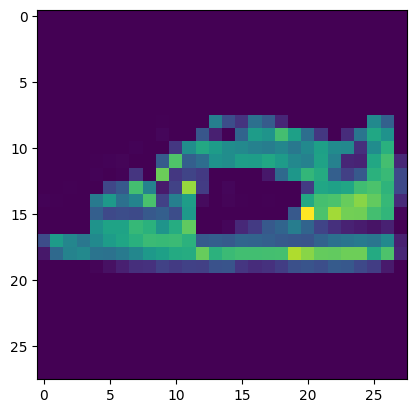

In [11]:
#showcase the image with its label and index
img_index = 13
label_index = y_train[img_index]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])

In [13]:
#normalize the data dimensions
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [14]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [15]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [16]:
# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [17]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=4,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/4
859/860 [============================>.] - ETA: 0s - loss: 1.3277 - accuracy: 0.4921
Epoch 1: val_loss improved from inf to 0.74100, saving model to model.weights.best.hdf5
860/860 [==============================] - 70s 79ms/step - loss: 1.3275 - accuracy: 0.4922 - val_loss: 0.7410 - val_accuracy: 0.7230
Epoch 2/4
  2/860 [..............................] - ETA: 58s - loss: 0.7479 - accuracy: 0.6719

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


859/860 [============================>.] - ETA: 0s - loss: 0.8059 - accuracy: 0.6890
Epoch 2: val_loss improved from 0.74100 to 0.68159, saving model to model.weights.best.hdf5
860/860 [==============================] - 64s 74ms/step - loss: 0.8060 - accuracy: 0.6889 - val_loss: 0.6816 - val_accuracy: 0.7560
Epoch 3/4
859/860 [============================>.] - ETA: 0s - loss: 0.7587 - accuracy: 0.7055
Epoch 3: val_loss improved from 0.68159 to 0.64985, saving model to model.weights.best.hdf5
860/860 [==============================] - 64s 74ms/step - loss: 0.7586 - accuracy: 0.7055 - val_loss: 0.6499 - val_accuracy: 0.7614
Epoch 4/4
859/860 [============================>.] - ETA: 0s - loss: 0.7282 - accuracy: 0.7205
Epoch 4: val_loss improved from 0.64985 to 0.62333, saving model to model.weights.best.hdf5
860/860 [==============================] - 65s 75ms/step - loss: 0.7284 - accuracy: 0.7205 - val_loss: 0.6233 - val_accuracy: 0.7676


In [20]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [21]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7523999810218811


313/313 [==============================] - 3s 10ms/step


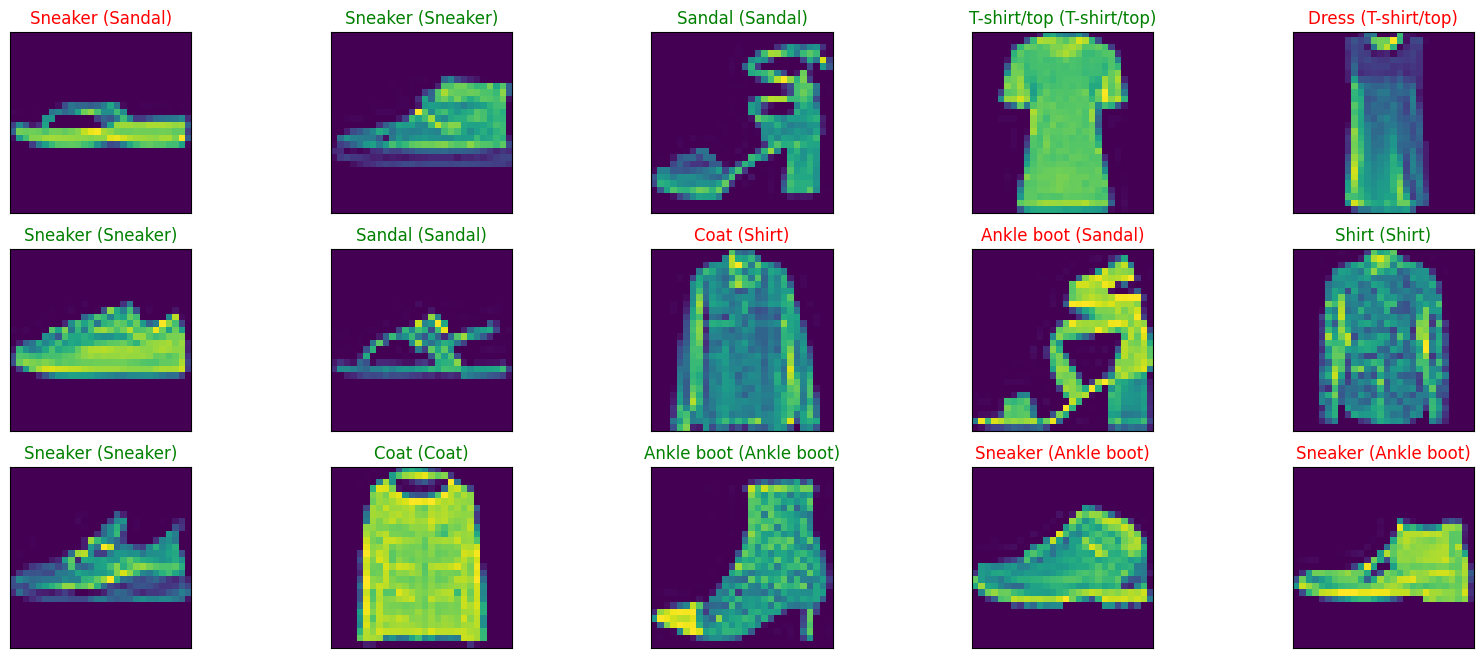

In [22]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))